This notebook contains implementation code needed to reproduce the data generation process of the framework described in the paper:

## Towards Building a Digital Twin of Complex System using Causal Modelling

by Luka Jakovljevic<sup>1,2</sup>, Dimitre Kostadinov<sup>1</sup>, Armen Aghasaryan<sup>1</sup> and Themis Palpanas<sup>2</sup>

<sup>1</sup>*Nokia Bell Labs, France*\
<sup>2</sup>*University of Paris, France*

>that is presented on **The 10th International Conference on Complex Networks and their Applications**\
*in Madrid, Spain (November 30 - December 2, 2021)* ["complexnetworks.org"](https://complexnetworks.org/)

>and will soon appear in **Volume 1015 of Springer - Studies in Computational Intelligence Series**

code published under:<br>
BSD 3-Clause License<br>
(for more info read ["LICENSE file"](https://github.com/nokia/causal-digital-twin/blob/main/LICENSE))

Copyright (c) 2021, Nokia<br>
All rights reserved.

### <br><br><br>Framework for creation  of  a  Digital  twin:

Modelling  behaviour  of  observable  system states, that enables mimicking:
* the appearance;
* propagation;
* and persistence of **faults** in time:

<img src = 'causal_digital_twin.JPG' />

#### _This notebook showcases how the **Causal Model** (input for a Digital Twin) is built given known Causal Structure and noisy-OR parameters, as defined in the paper._

> **Content of this notebook:**
1. Loading `causal_digital_twin` python module;<br>
2. Defining Causal Structure (DAG);<br>
3. Parametrizing a DAG (defining SCM);<br>
4. Building a Causal Model and Generating Synthetic Alerts.

# <br><br><br>1. Loading `causal_digital_twin` python module:

In [1]:
# import all functions from module
from causal_digital_twin import *

# <br><br><br>2. Defining Causal Structure (DAG):

#### defining input parameters for a graph:

In [2]:
graph_size = 5 # graph size
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000 # length of time series (number of samples)

#### generating a random (ER) DAG of size n and edge probability p with function `generate_DAG`:

In [3]:
# generate DAG
DAG = generate_DAG(graph_size, prob)

# function above generates a random (ER) DAG of size n and edge probability p 

#### veryfing that generated graph is indeed directed and acyclic:

In [4]:
# get undirected version in order so we can perform function nx.is_connected() below
undirected = DAG.to_undirected(reciprocal=False, as_view=False)
# check if we obtained a DAG                               
if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
    print("Successful: Constructed graph is a DAG -> Continue to the following cell")
else:
    # since graph generation process is random, sometimes the graph is not a DAG
    print("Error: No DAG -> Run previous cell again")   

Successful: Constructed graph is a DAG -> Continue to the following cell


#### visualizing future causal relations between alerts:

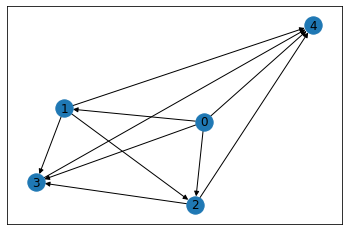

In [5]:
# visualize DAG:
plot_DAG(DAG)

# <br><br><br>3. Parametrizing a DAG (defining SCM):

function `parametrize_DAG` below parametrizes DAG with SCM probabilities:
* `lam:` probability that fault appears
* `v_self:` probability that fault persists on a node
* `v_prop:` probability that fault propagates to child node
* `lag:` time (samples) needed for a fault to propagate from parent to child
* `step:` probability resolution

In [6]:
# parametrize DAG with desired probabilities (defining range of probabilities)
parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)

# <br><br><br>4. Building a Causal Model and Generating Synthetic Alerts:

#### function `time_series` below instantiates Causal Model (SCM) and synthesizes time series of desired length:

In [7]:
# create dataset and extract ground truth list
dataset = time_series(DAG, 1000)
dataset = dataset.astype('int32')

Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful


#### Verifying that none of the alerts is always active:

In [8]:
durations = dataset.sum(axis=0)
# if alert is almost always active (>98%) we run the simulation again
durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
if sum(durations_thresholded) < 1:
    print("Simulation successful -> Continue to the following cell")        

else:
    print("Error: There is at least one alert which is always active -> Run previous cell again")

Simulation successful -> Continue to the following cell


#### Plotting synthetic alerts:

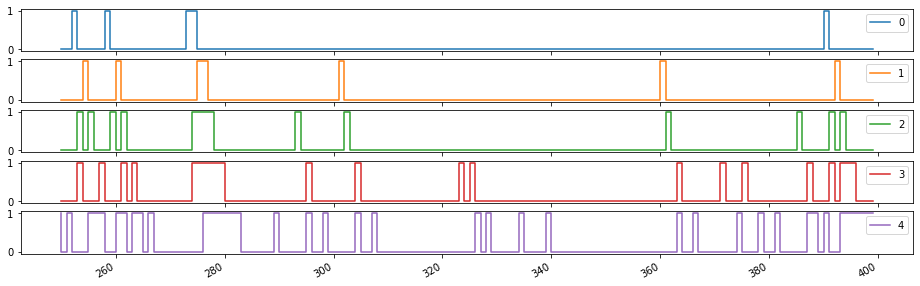

In [9]:
dataset[250:400].plot(subplots=True, drawstyle="steps", figsize=(16, 5));

## Saving dataset if needed

In [ ]:
# save dataset
dataset.to_csv('dataset-demo.csv', header=True, index = False)

# save DAG parameters - ground truth
nx.write_gexf(DAG, 'dataset-demo-groundtruth.gexf')